In [8]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
dataset=pd.read_csv('/home/rgukt/Downloads/1729258-1613615-Stock_Price_data_set_(1) (1).csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [10]:
dataset.shape

(1009, 7)

In [11]:
dataset.drop('Adj Close',axis=1,inplace=True)

In [12]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


In [14]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
 5   Volume  1009 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.4+ KB


In [16]:
dataset.describe()

,Open,High,Low,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07


<Axes: >

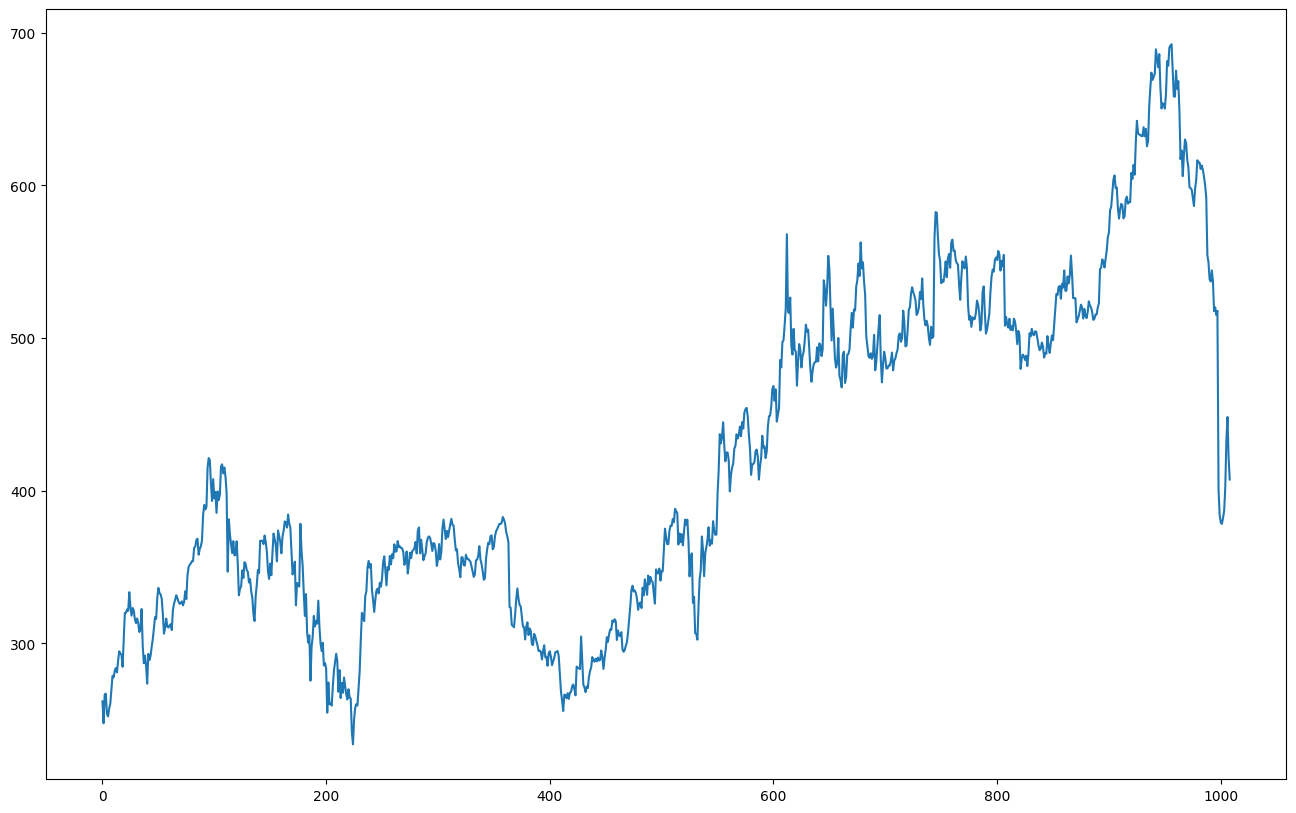

In [21]:
dataset['Open'].plot(figsize=(16,10))

In [24]:
X=dataset[['Open','High','Low','Volume']]
y=dataset['Close']

In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=0)

In [28]:
X_train.shape

(756, 4)

In [29]:
X_test.shape

(253, 4)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
reg=LinearRegression()

In [31]:
reg.fit(X_train,y_train)

LinearRegression()

In [32]:
print(reg.coef_)

[-5.98637669e-01  7.42752459e-01  8.57948723e-01  9.68159262e-08]


In [33]:
print(reg.intercept_)

-0.7077595574152156


In [35]:
predicted=reg.predict(X_test)
print(X_test)

            Open        High         Low    Volume
801   557.000000  559.750000  550.299988   2720300
311   378.000000  383.500000  374.510010   5398200
85    368.540009  368.700012  357.799988   8278000
435   278.049988  285.750000  277.350006   6248400
204   260.549988  266.250000  253.800003  12498600
...          ...         ...         ...       ...
583   418.829987  426.720001  415.980011   3743700
200   283.790009  285.089996  269.149994  12993800
767   525.000000  548.539978  518.280029   4136500
1000  379.140015  387.709991  365.130005  15145800
385   298.859985  303.549988  296.269989   6905800

[253 rows x 4 columns]


In [36]:
dframe=pd.DataFrame(y_test,predicted)
dataframe=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted})
print(dataframe)

      Actual Price  Predicted Price
801     553.729980       553.999288
311     379.059998       379.685786
85      361.399994       360.298634
435     281.859985       283.639587
204     261.429993       260.032497
...            ...              ...
583     425.920013       422.764132
200     270.600006       273.331047
767     546.150024       537.495050
1000    366.420013       375.026471
385     302.799988       300.698946

[253 rows x 2 columns]


In [38]:
dataframe.head(15)

,Actual Price,Predicted Price
801,553.729980,553.999288
311,379.059998,379.685786
85,361.399994,360.298634
435,281.859985,283.639587
204,261.429993,260.032497
590,434.480011,434.730957
1,265.720001,260.518692
780,518.020020,518.570772
457,315.929993,315.400869
299,348.869995,345.455041


In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
import math

In [41]:
print('Mean Absolut Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolut Error: 3.1240881273722767


In [42]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 19.163612341469143


In [44]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 4.377626336437264


In [45]:
graph=dataframe.head(20)

<Axes: >

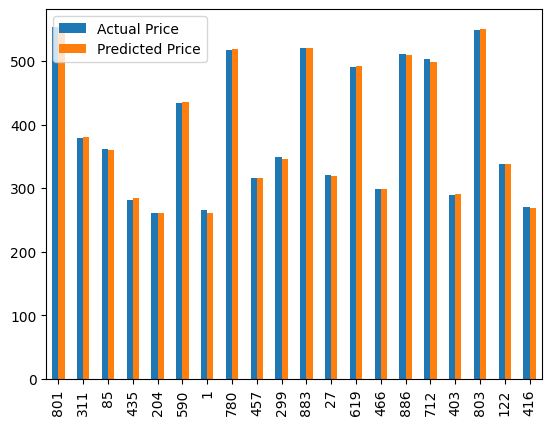

In [49]:
graph.plot(kind='bar')